### Load packages, data  and explore it

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from datavis_fun import *


import jupyter_black

jupyter_black.load()

In [32]:
from IPython.display import display, HTML

# Pandas options
pd.set_option("display.max_columns", None)

# Set the format for floats
pd.options.display.float_format = "{:,}".format

In [33]:
orig_df = pd.read_csv("marketing_data.csv")
orig_df

,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
0,1,2021-02-01,facebook_tier1,social,349043,148263,"7,307.37",1210,13,1,"4,981.0"
1,2,2021-02-01,facebOOK_tier2,social,348934,220688,"16,300.2",1640,48,3,"14,962.0"
2,3,2021-02-01,google_hot,search,89459845,22850,"5,221.6",457,9,1,"7,981.0"
3,4,2021-02-01,google_wide,search,127823,147038,"6,037.0",1196,24,1,"2,114.0"
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,"29,962.2",2258,49,10,"84,490.0"
...,...,...,...,...,...,...,...,...,...,...,...
303,304,2021-02-28,instagram_tier2,social,983498,775780,760.75,1024,4,0,0.0
304,305,2021-02-28,facebook_retargeting,social,4387490,1933,224.81,58,0,0,0.0
305,306,2021-02-28,facebook_lal,social,544756,25840,"6,844.8",248,5,1,"1,491.0"
306,307,2021-02-28,instagram_blogger,influencer,374754,94058,"4,845.65",594,12,1,"5,008.0"


Column description

- c_date: date of spending of the marketing budget
- campaign_name: description of campaign
- category: type of marketing source
- campaign_id: unique identifier
- impressions: number of times the ad has been shown
- mark_spent: budget money spent on this campaign on this day
- clicks: how many people clicked on a banner (=visited website)
- leads: how many people signed up and left their credentials
- orders: how many people paid for the product
- revenue: how much money we earned



In [34]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             308 non-null    int64  
 1   c_date         308 non-null    object 
 2   campaign_name  308 non-null    object 
 3   category       308 non-null    object 
 4   campaign_id    308 non-null    int64  
 5   impressions    308 non-null    int64  
 6   mark_spent     308 non-null    float64
 7   clicks         308 non-null    int64  
 8   leads          308 non-null    int64  
 9   orders         308 non-null    int64  
 10  revenue        308 non-null    float64
dtypes: float64(2), int64(6), object(3)
memory usage: 26.6+ KB


Check for duplicated rows

In [35]:
show_dup_rows(orig_df)

No identical rows found.


Change date object from object to datetime 

In [36]:
format = "%Y-%m-%d"
orig_df["c_date"] = pd.to_datetime(orig_df.c_date, format=format)

In [37]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             308 non-null    int64         
 1   c_date         308 non-null    datetime64[ns]
 2   campaign_name  308 non-null    object        
 3   category       308 non-null    object        
 4   campaign_id    308 non-null    int64         
 5   impressions    308 non-null    int64         
 6   mark_spent     308 non-null    float64       
 7   clicks         308 non-null    int64         
 8   leads          308 non-null    int64         
 9   orders         308 non-null    int64         
 10  revenue        308 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 26.6+ KB


From here we can also see that there are no NaN values in the dataframe.

In [38]:
rep_dict = {}

for i in orig_df.campaign_name.unique():
    rep_dict[i] = i.lower()

orig_df.campaign_name = orig_df.campaign_name.replace(rep_dict)

In [39]:
grp = orig_df.groupby("campaign_name")

In [40]:
for div_cr, data in grp:
    str = " Campaign Name: {}\n\n First day of the campaign: {}\n Last day of the campaign: {}\n Campaign Active for: {} days\n\n".format(
        div_cr, data.c_date.min(), data.c_date.max(), data.c_date.unique().size
    )
    print(str)

 Campaign Name: banner_partner

 First day of the campaign: 2021-02-01 00:00:00
 Last day of the campaign: 2021-02-28 00:00:00
 Campaign Active for: 28 days


 Campaign Name: facebook_lal

 First day of the campaign: 2021-02-01 00:00:00
 Last day of the campaign: 2021-02-28 00:00:00
 Campaign Active for: 28 days


 Campaign Name: facebook_retargeting

 First day of the campaign: 2021-02-01 00:00:00
 Last day of the campaign: 2021-02-28 00:00:00
 Campaign Active for: 28 days


 Campaign Name: facebook_tier1

 First day of the campaign: 2021-02-01 00:00:00
 Last day of the campaign: 2021-02-28 00:00:00
 Campaign Active for: 28 days


 Campaign Name: facebook_tier2

 First day of the campaign: 2021-02-01 00:00:00
 Last day of the campaign: 2021-02-28 00:00:00
 Campaign Active for: 28 days


 Campaign Name: google_hot

 First day of the campaign: 2021-02-01 00:00:00
 Last day of the campaign: 2021-02-28 00:00:00
 Campaign Active for: 28 days


 Campaign Name: google_wide

 First day of the

All these marketing campaigns were active in February 2021

## Analysis by Marketing Campaign Name

### Dataset for Exploration by Campaign Name & Metrics Calculation

In [41]:
orig_df.columns

Index(['id', 'c_date', 'campaign_name', 'category', 'campaign_id',
       'impressions', 'mark_spent', 'clicks', 'leads', 'orders', 'revenue'],
      dtype='object')

In [42]:
sumtab_cname = (
    orig_df.groupby(["campaign_name"])
    .agg(
        impressions_total=("impressions", "sum"),
        clicks_total=("clicks", "sum"),
        leads_total=("leads", "sum"),
        spent_total=("mark_spent", "sum"),
        orders_total=("orders", "sum"),
        revenue_total=("revenue", "sum"),
    )
    .reset_index()
    .assign(
        avg_spending_per_order=lambda x: x["revenue_total"] / x["orders_total"],
        # CPM (Cost-per-mille)
        CPM=lambda x: x["spent_total"] / x["impressions_total"] * 1000,
        # Click-through rate
        CTR=lambda x: round(x["clicks_total"] / x["impressions_total"] * 100, 2),
        # Cost-per-click
        CPC=lambda x: x["spent_total"] / x["clicks_total"],
        # CR1. Conversion rate 1: lead/clicks How clicks converted into leads?
        CR1=lambda x: x["leads_total"] / x["clicks_total"],
        # Cost-per-lead
        CPL=lambda x: x["spent_total"] / x["leads_total"],
        # Customer acquisition cost
        CAC_mark_only=lambda x: x["orders_total"] / x["spent_total"],
        # How leads converted into payable customers???
        CR2=lambda x: x["orders_total"] / x["leads_total"],
        # Return on investment
        ROI=lambda x: (x["revenue_total"] - x["spent_total"]) / x["spent_total"] * 100,
    )
)

sumtab_cname

,campaign_name,impressions_total,clicks_total,leads_total,spent_total,orders_total,revenue_total,avg_spending_per_order,CPM,CTR,CPC,CR1,CPL,CAC_mark_only,CR2,ROI
0,banner_partner,1068337427,420003,10149,"5,026,674.76",1566,"6,152,960.0","3,929.093231162197",4.705137752325511,0.04,11.968187751039872,0.02416411311347776,495.28768942752976,0.00031153795993755525,0.15430091634643808,22.406168964072787
1,facebook_lal,12697701,120012,1909,"2,641,939.24",294,"300,233.0","1,021.2006802721088",208.0643763780546,0.95,22.01395893743959,0.015906742659067427,"1,383.9388370874806",0.00011128189306882016,0.1540073336825563,-88.63588550961528
2,facebook_retargeting,976685,29954,506,"266,466.22",108,"536,919.0","4,971.472222222223",272.8271858378085,3.07,8.895847633037324,0.01689256860519463,526.6130830039525,0.0004053046573783349,0.2134387351778656,101.49608456936869
3,facebook_tier1,63044882,239997,3535,"2,564,793.48",474,"2,396,412.0","5,055.721518987341",40.682025227678274,0.38,10.686773084663558,0.01472935078355146,725.5427100424328,0.00018481020156055605,0.1340876944837341,-6.565108704190872
4,facebook_tier2,69623161,329973,8428,"4,693,870.97",688,"3,463,306.0","5,033.875",67.41823988715478,0.47,14.225015289129717,0.02554148369715098,556.9377040816327,0.00014657411854676527,0.08163265306122448,-26.216420900040205
5,google_hot,4628993,90048,1833,"1,199,998.76",281,"2,205,747.0","7,849.633451957296",259.23538013559323,1.95,13.326212242359631,0.02035581023454158,654.6638079650845,0.00023416690863913893,0.15330060010911076,83.81243993952127
6,google_wide,67669259,240006,5274,"2,260,401.31",547,"1,499,318.0","2,740.983546617916",33.40366576202645,0.35,9.41810333908319,0.02197445063873403,428.59334660599166,0.0002419924274420103,0.1037163443306788,-33.670273797532
7,instagram_blogger,34112411,299959,7008,"4,247,367.57",1100,"5,808,454.0","5,280.412727272727",124.51091686248739,0.88,14.159827076367105,0.02336319296970586,606.0741395547946,0.00025898394284721627,0.1569634703196347,36.75421079697135
8,instagram_tier1,75136799,269961,6632,"2,565,277.25",758,"4,544,124.0","5,994.88654353562",34.141423166030805,0.36,9.502399420657058,0.024566511459062607,386.80296290711703,0.0002954846303650025,0.11429433051869722,77.13968343967498
9,instagram_tier2,137806768,509992,10374,"1,066,153.75",313,"670,460.0","2,142.0447284345046",7.736584824338961,0.37,2.090530341652418,0.020341495552871416,102.77171293618662,0.00029357867005579634,0.03017158280316175,-37.11413574261686


### Key Metrics Visualization for Each Marketing Campaign

In [43]:
media_col_dict = {
    "banner_partner": GREY_LIGHT,
    "facebook_tier2": BLUE,
    "facebook_lal": BLUE,
    "facebook_retargeting": BLUE,
    "facebook_tier1": BLUE,
    "google_hot": GREEN,
    "google_wide": GREEN,
    "instagram_blogger": ORANGE,
    "instagram_tier1": ORANGE,
    "instagram_tier2": ORANGE,
    "youtube_blogger": RED,
}

### CPM

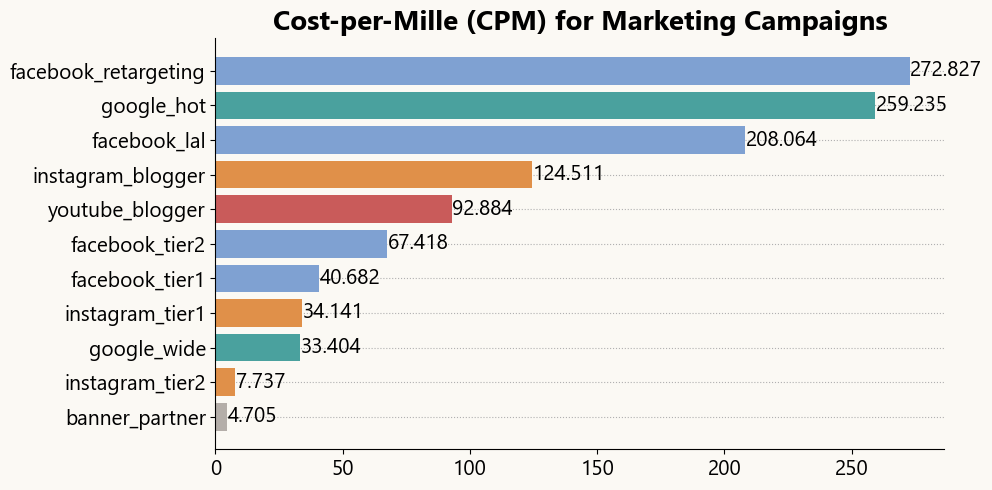

In [44]:
plot_hbars_custom(
    df=sumtab_cname.sort_values("CPM"),
    catcol="campaign_name",
    valcol="CPM",
    ptitle="Cost-per-Mille (CPM) for Marketing Campaigns",
    coldict=media_col_dict,
    myfont="Segoe UI",
    fs=(10, 5),
)

It's worth noting that CPM is more important for campaigns which aim is to spread awareness of the brand. Based on description of a dataset I can't tell what exact goals were set for the marketing camapaign and so I'm going to examine all the metrics. However, I think that any business wants to generate as much leads as possible, and from this perspective metrics such as CTR, CPC, CPL and CR1 are more important.

facebook_retargeting has the higher CPM being equal to 272.827. It's followed by google_hot and facebook_lal with 259.235 and 208.064 CPM values respectively. Observing these values only can't tell us whether such spendings actually payed off as higher CPM might suggest that ads are being placed in more prominent or exclusive placements within a website or app. This can enhance visibility and potentially improve ad performance metrics such as click-through rates (CTR).

banner_partner has the lowest CPM being equal to 4.705, indicating that this marketing campaign allows the business to reach broader audience without spending much resources on the matter. The same can be said about instagram_tier2. In other words, channels from the bottom of the plot are specifically useful for spreading awareness about the brand.

### CTR

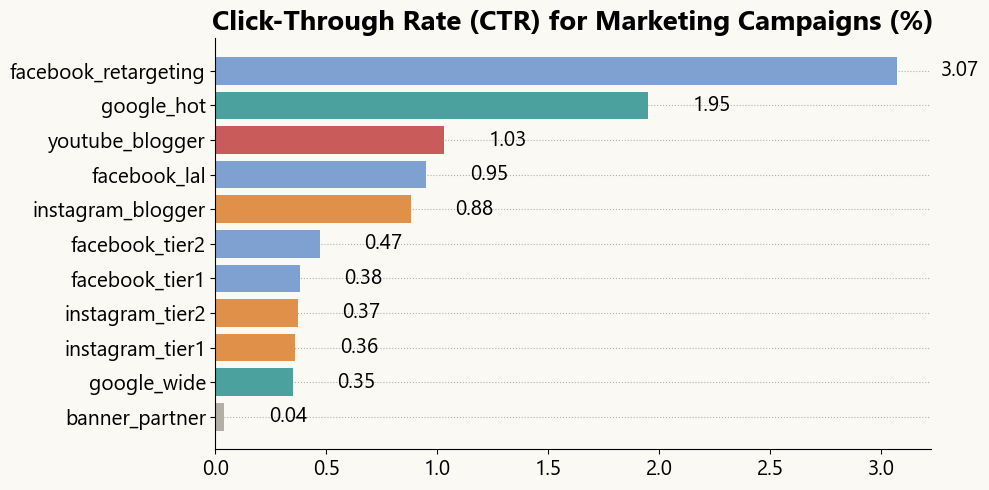

In [45]:
plot_hbars_custom(
    df=sumtab_cname.sort_values("CTR"),
    catcol="campaign_name",
    valcol="CTR",
    ptitle="Click-Through Rate (CTR) for Marketing Campaigns (%)",
    coldict=media_col_dict,
    myfont="Segoe UI",
    fs=(10, 5),
)

Facebook retargeting, google_hot and youtube_blogger stand out with the CTR of 3.07%, 1.95% and 1.03% respectively, indicating that these marketing channels are very effective at attracting people. The same can be said about facebook_lal (Look-a_like). Recalling previous visualisations, we can remember that CPM for facebook_retargeting and google_hot were among the highest. Now, looking at CTR rates, we can see that such high spendings for 1000 impressions were justifiable.

 Unfortunately there are problems with CTR in marketing campaigns through banner_partner, google_wide, instagram_tier1 and instagram_tier2. This might be caused by irrelevant targeting on the respective platforms. It seems like the ads/banners are shown to wrong people.

### CPC

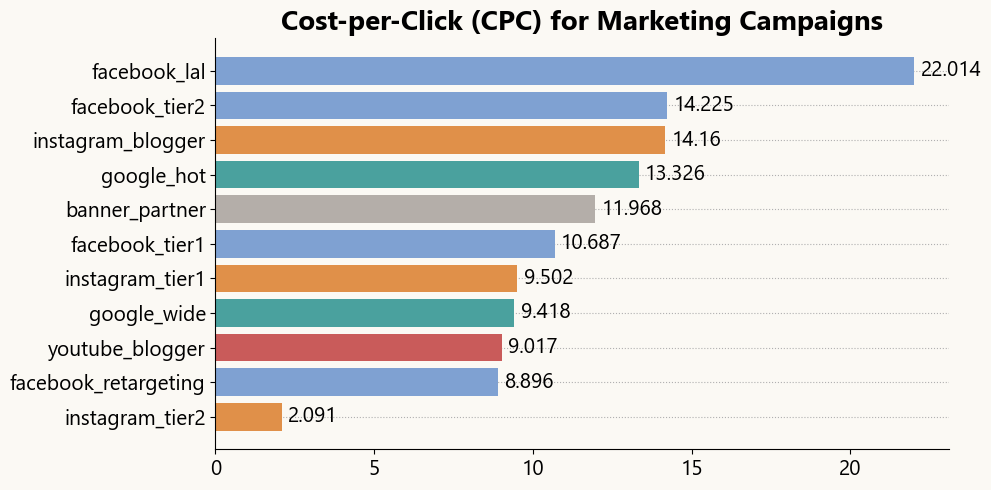

In [46]:
plot_hbars_custom(
    df=sumtab_cname.sort_values("CPC"),
    catcol="campaign_name",
    valcol="CPC",
    ptitle="Cost-per-Click (CPC) for Marketing Campaigns",
    coldict=media_col_dict,
    myfont="Segoe UI",
    fs=(10, 5),
)

High Cost-per-Click rate indicates that given our total spendings on a marketing campaign, the business didn't get many clicks meaning that each click costs a lot. This might be because of competitive advertising landscape, premium add placement or low CTR (wrong audience). Facebook LAL has the highest CPC rate being equal to 22.014. Compared to other marketing campaigns, it's much more expensive. It's followed by facebook_tier 2 with CPC  being equal to 14.225.

Instagram_tier2 has lowest CPC indicating that it's the most cost-effective option among others. The same can be said about facebook_retargeting.

### CR1

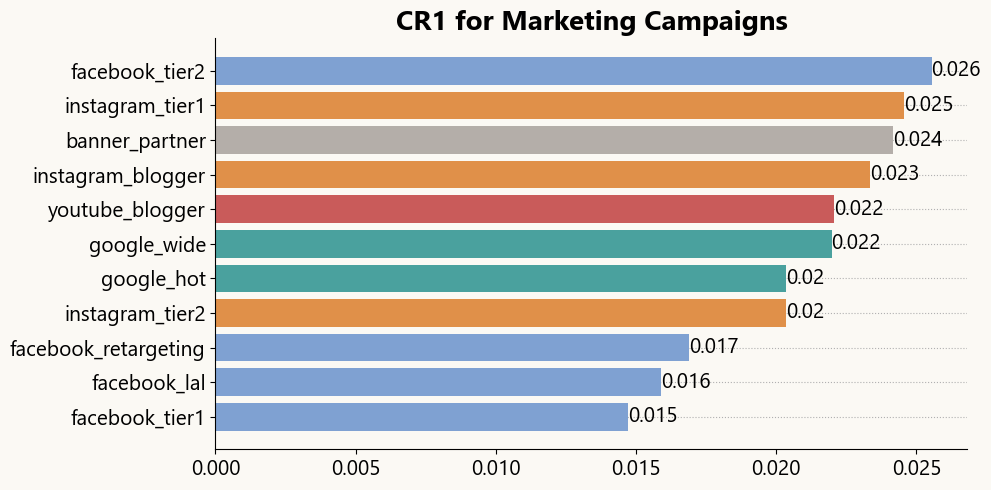

In [47]:
plot_hbars_custom(
    df=sumtab_cname.sort_values("CR1"),
    catcol="campaign_name",
    valcol="CR1",
    ptitle="CR1 for Marketing Campaigns",
    coldict=media_col_dict,
    myfont="Segoe UI",
    distbwpllab=0.000001,
    fs=(10, 5),
)

Facebook_tier2 yields the highest CR1 being equal to 0.026 despite having moderate CTR and high CPC. In other words clicks are best converted into leads through facebook_tier2. It's followed by instagram_tier1 with CR1 being equal to 0.025. Unfortunately, instagram_tier1 has relatively low CTR compared to other marketing campaigns. Facebook_lal and Facebook_tier1 on the other hand convert clicks into leads poorly. Facebook_lal also has very high CPC compared to other marketing platforms but moderate CTR. The marketing channels on the top of the plot yield most potential clients.

facebook_retargeting, facebook_tier1 and facebook_lal on the other hand do not really gain much leads. It's worth noting that facebook_retargeting has the highest CTR among other platforms indicating that there might be a mismatch between content of an add and what users see after clicking. The same logic can be applied to facebook_lal and facebook_tier1 campaigns as they had moderate CTR but failed to successfully covert users into leads.

### CPL

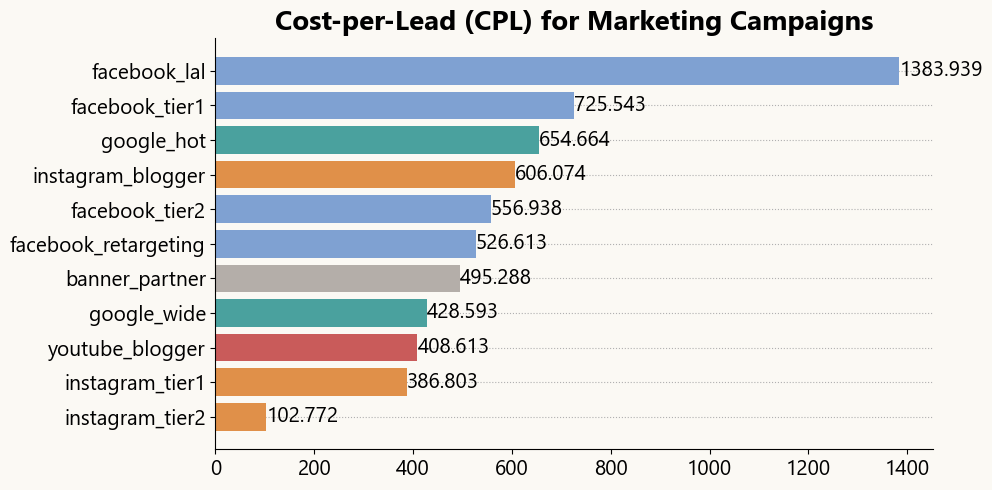

In [48]:
plot_hbars_custom(
    df=sumtab_cname.sort_values("CPL"),
    catcol="campaign_name",
    valcol="CPL",
    ptitle="Cost-per-Lead (CPL) for Marketing Campaigns",
    coldict=media_col_dict,
    myfont="Segoe UI",
    fs=(10, 5),
)

Lead is a person who submitted a form with a personal information, used some of our free products, subscribed to a news-letter etc. In other words these are people who still didn't spend any money but are closer to doing so compared to others. Lead definition is formulated by each company based on an industry, field. Here, once again, facebook_lal CPL is very high indicating that gaining one lead from this marketing campaign demands a lot. Moreover, it's much higher than next CPL among marketing platforms. Reminding that facebook_lal also has one of the lowest CR1 which explains why one lead costs that much. The same can be said about facebook_tier1. The most "cheap" leads are generated through instagram (not instagram bloggers).

### CAC (Marketing spendings only)

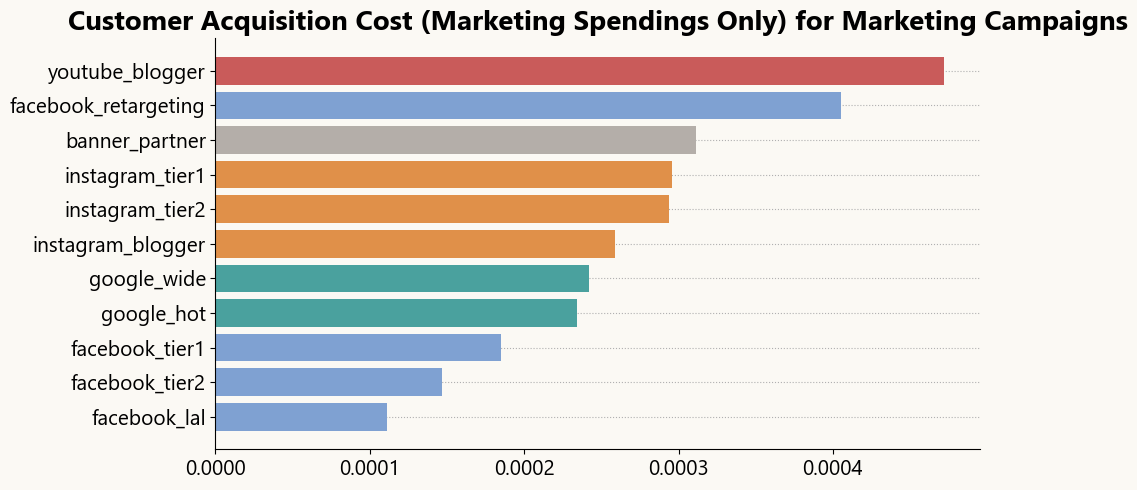

In [49]:
plot_hbars_custom(
    df=sumtab_cname.sort_values("CAC_mark_only"),
    catcol="campaign_name",
    valcol="CAC_mark_only",
    ptitle="Customer Acquisition Cost (Marketing Spendings Only) for Marketing Campaigns",
    coldict=media_col_dict,
    myfont="Segoe UI",
    distbwpllab=0.000001,
    showlab=False,
    fs=(10, 5),
)

### CR2

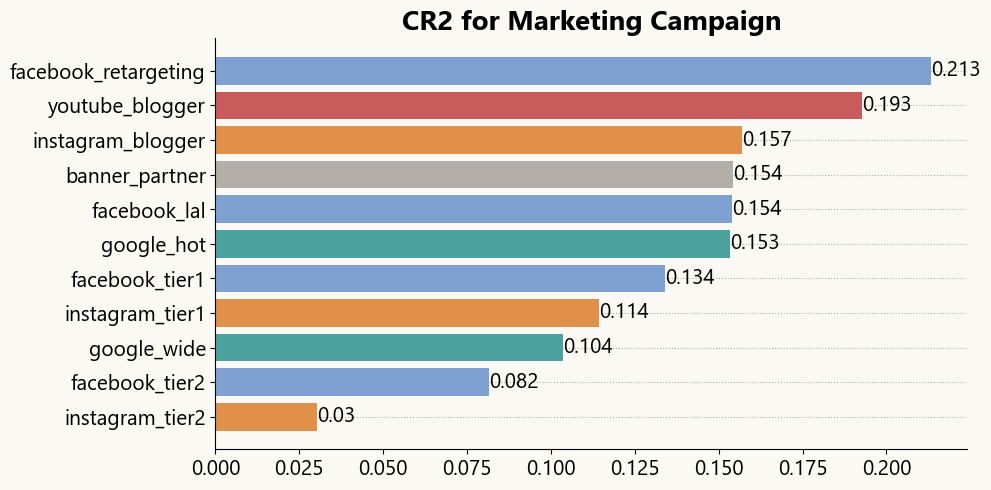

In [50]:
plot_hbars_custom(
    df=sumtab_cname.sort_values("CR2"),
    catcol="campaign_name",
    valcol="CR2",
    ptitle="CR2 for Marketing Campaign",
    coldict=media_col_dict,
    myfont="Segoe UI",
    distbwpllab=0.000001,
    fs=(10, 5),
)

CR2 indicates how each marketing campaign was able to convert leads into actual customers who yield revenue for a business. Facebook_retargeting was able to convert highest proportion of leads into customers (21.3%) followed by youtube_blogger (19.3%) and instagram_blogger (15.7%). From this plot alone it seems like marketing through bloggers gains a lot of revenue. Still there is a question on what kind of customers these channels bring to the bussiness as some platforms may bring more solvent audience than the other. 

From the plot above we can see that even though CR2 for instagram_tier1 was not very high, leads generated from instagram_tier1 on average tend to spend more than leads from banner_partner campaign indicating that having not really great CR2 can still convert into considerable revenue.

### ROI

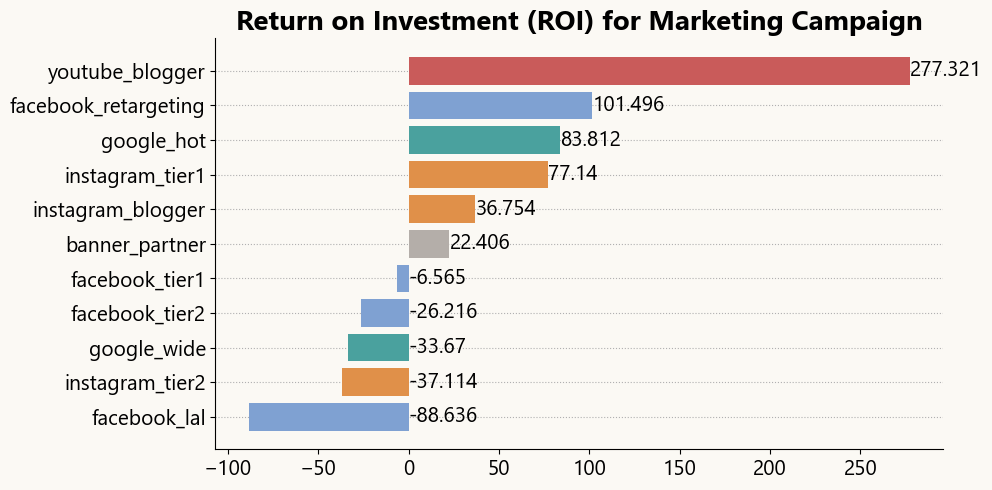

In [51]:
plot_hbars_custom(
    df=sumtab_cname.sort_values("ROI"),
    catcol="campaign_name",
    valcol="ROI",
    ptitle="Return on Investment (ROI) for Marketing Campaign",
    coldict=media_col_dict,
    myfont="Segoe UI",
    showlab=True,
    fs=(10, 5),
)

From the plot above we can see that marketing campaigns through youtube_blogger, facebook_retargeting, google_hot, instagram_tier1, instagram_blogger and banner_partner were actually profitable for the business. Let me calculate return on investment from marketing in February 2021:

### Spending per Order in Each Marketing Campaign

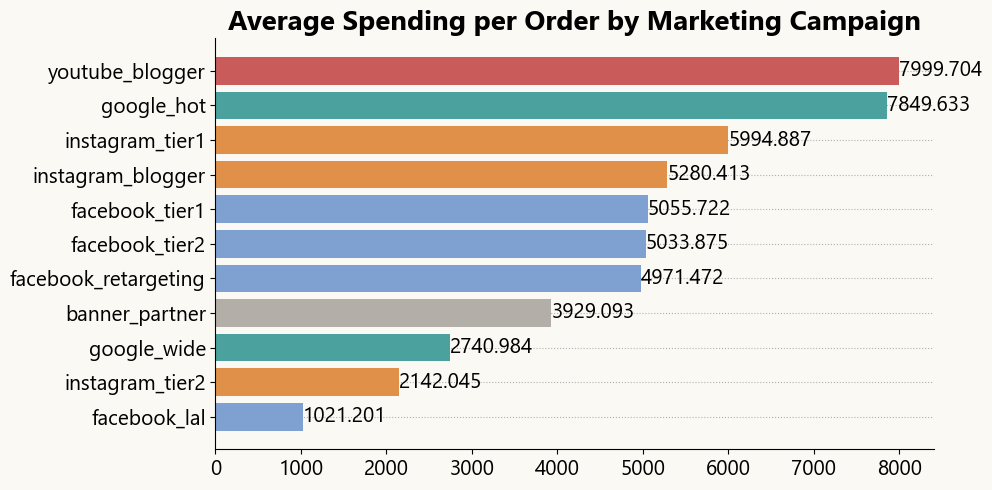

In [52]:
plot_hbars_custom(
    df=sumtab_cname.sort_values("avg_spending_per_order"),
    catcol="campaign_name",
    valcol="avg_spending_per_order",
    ptitle="Average Spending per Order by Marketing Campaign",
    coldict=media_col_dict,
    myfont="Segoe UI",
    distbwpllab=0.000001,
    fs=(10, 5),
)

### Agreggate Visual for Key Metrics per Marketing Campaign

C:\Users\melko\AppData\Local\Temp\ipykernel_20316\1084186346.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid(shape=(16, 8), loc=(0, 0), colspan=4, rowspan=3)  # CPM


The graph was saved into d:\python\projects\digital_marketing


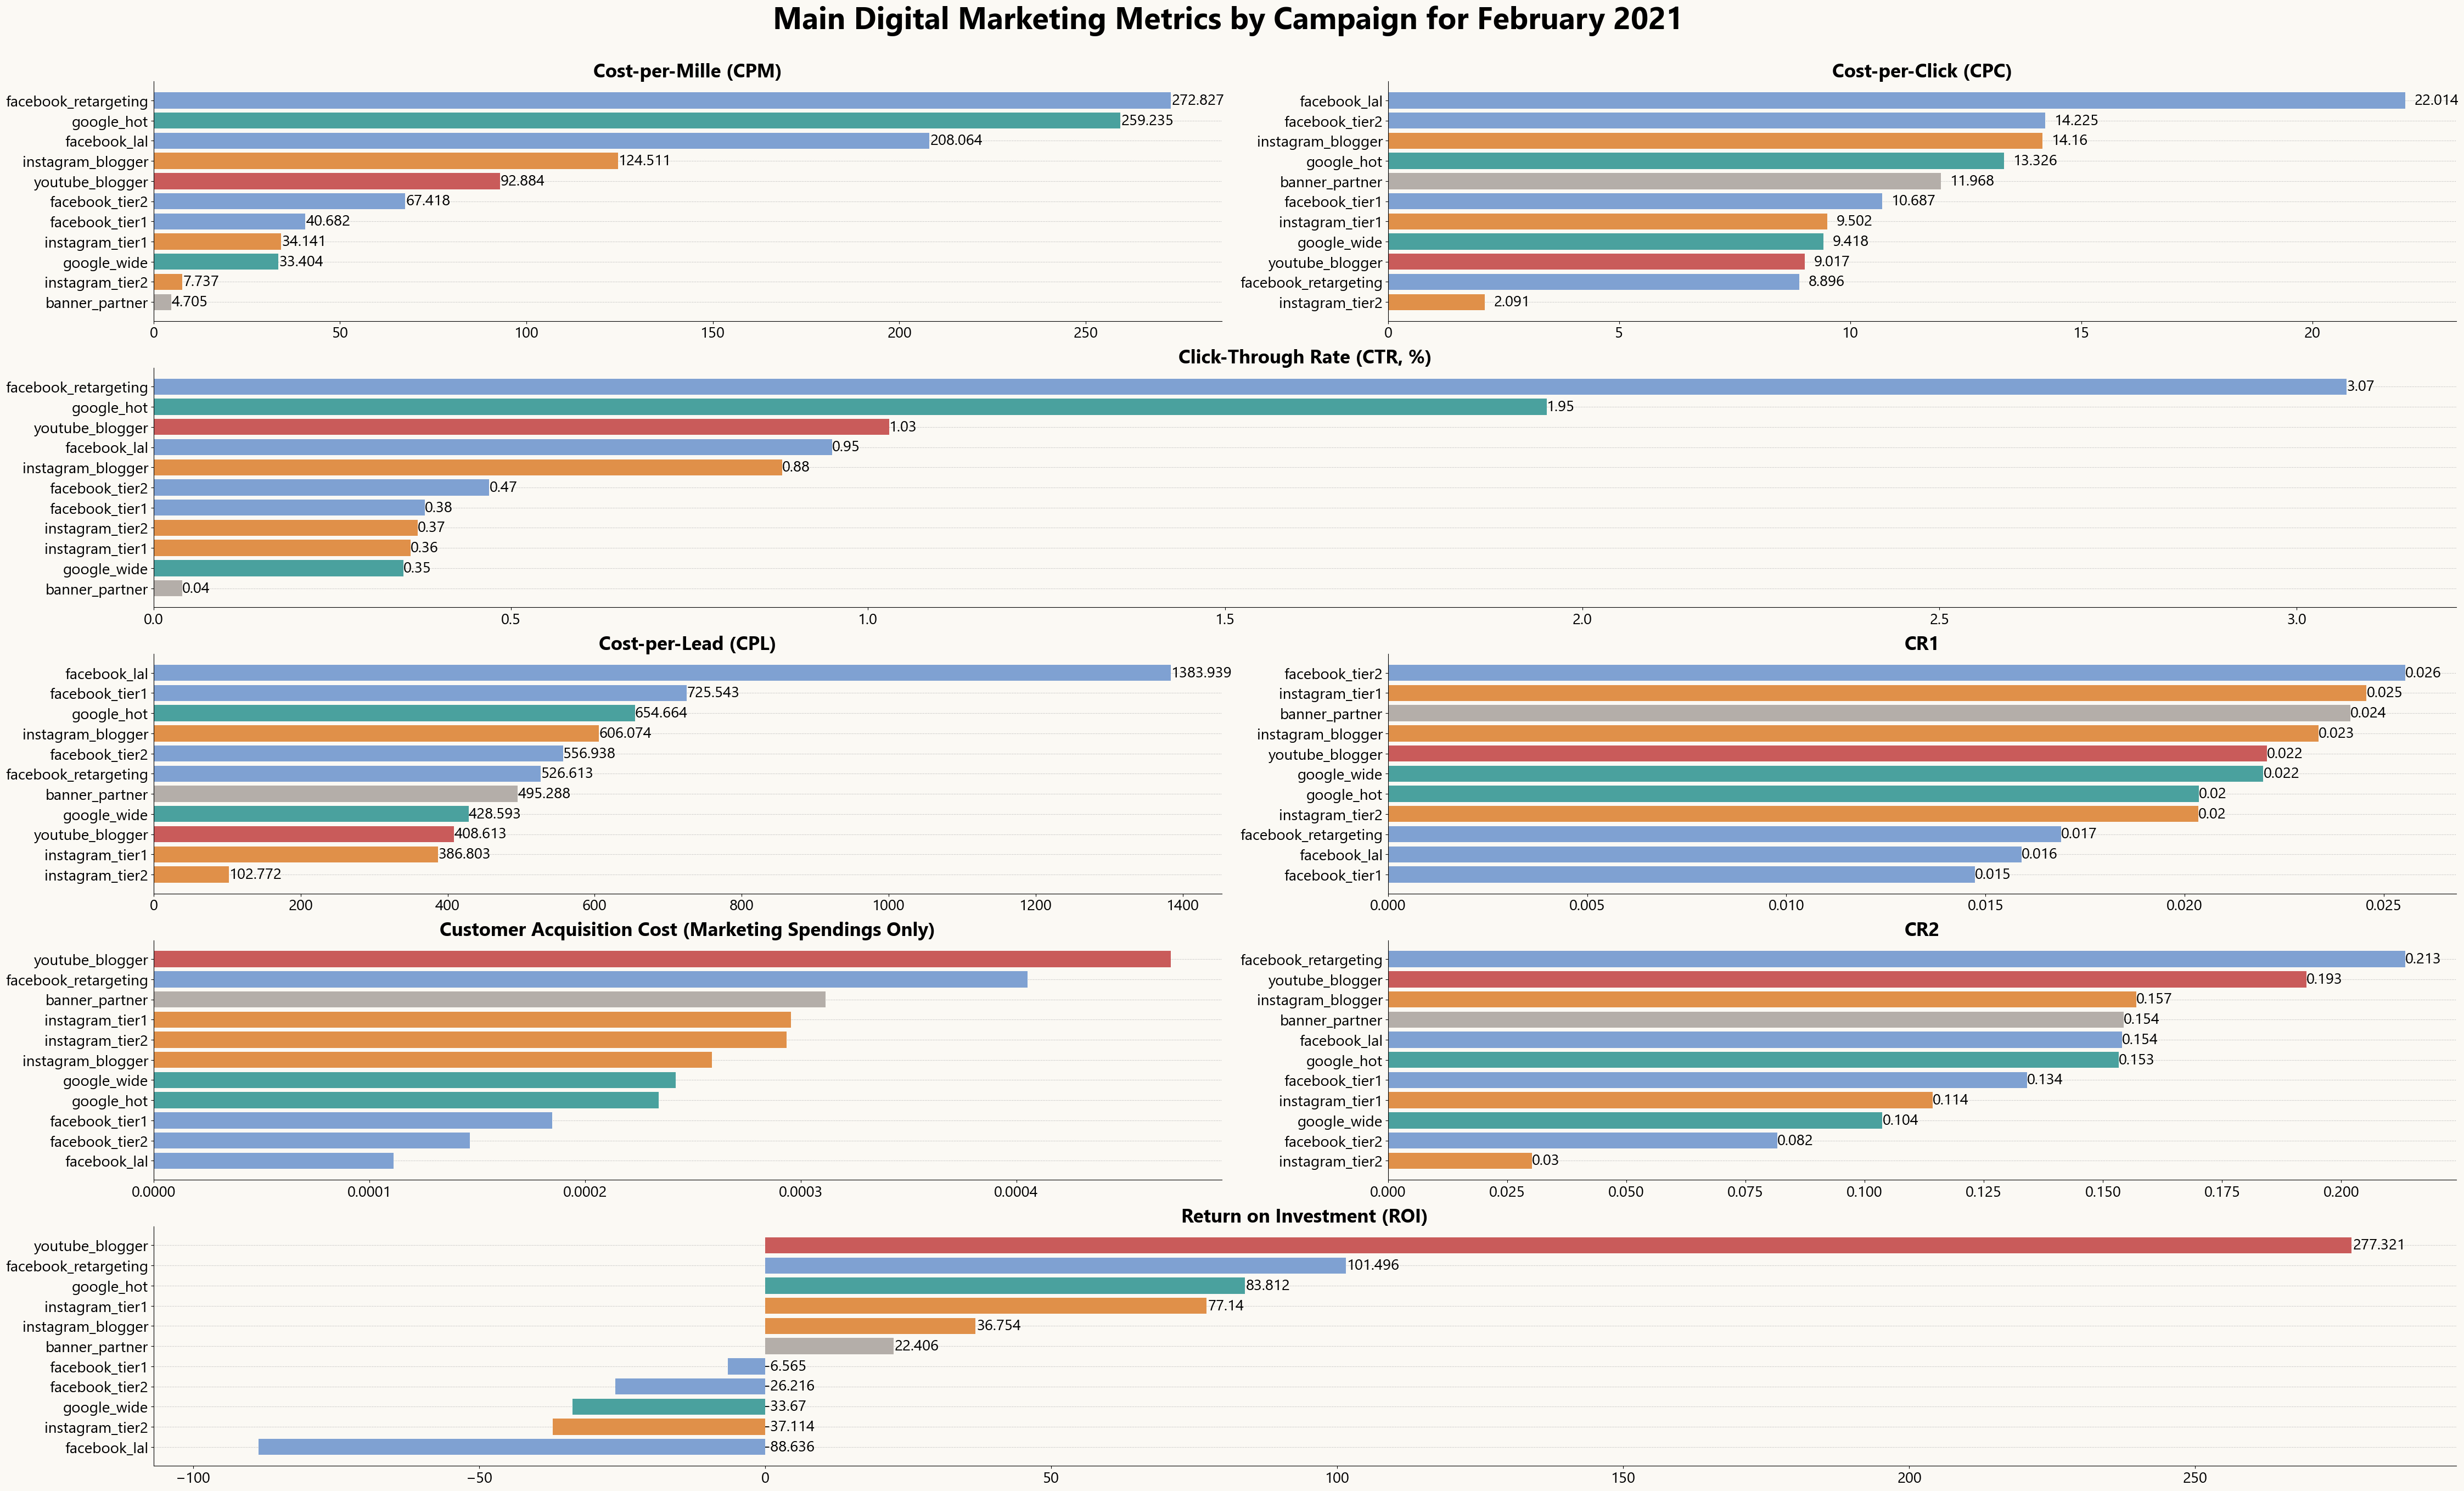

In [53]:
data = sumtab_cname

fig, axs = plt.subplots(figsize=(45, 30))
fig.set_facecolor(BG_WHITE)

ax1 = plt.subplot2grid(shape=(16, 8), loc=(0, 0), colspan=4, rowspan=3)  # CPM
ax2 = plt.subplot2grid(shape=(16, 8), loc=(0, 4), colspan=4, rowspan=3)  # CPC
ax3 = plt.subplot2grid(shape=(16, 8), loc=(3, 0), colspan=8, rowspan=3)  # CTR
ax4 = plt.subplot2grid(shape=(16, 8), loc=(6, 0), colspan=4, rowspan=3)  # CPL
ax5 = plt.subplot2grid(shape=(16, 8), loc=(6, 4), colspan=4, rowspan=3)  # CR1
ax6 = plt.subplot2grid(shape=(16, 8), loc=(9, 0), colspan=4, rowspan=3)  # CAC
ax7 = plt.subplot2grid(shape=(16, 8), loc=(9, 4), colspan=4, rowspan=3)  # CR2
ax8 = plt.subplot2grid(shape=(16, 8), loc=(12, 0), colspan=8, rowspan=3)  # ROI

plot_hbars_custom(
    df=data.sort_values("CPM"),
    catcol="campaign_name",
    valcol="CPM",
    ax=ax1,
    ptitle="Cost-per-Mille (CPM)",
    ptitlesize=25,
    textlabsize=20,
    ticksize=20,
    coldict=media_col_dict,
    myfont="Segoe UI",
)

plot_hbars_custom(
    df=data.sort_values("CPC"),
    catcol="campaign_name",
    valcol="CPC",
    ax=ax2,
    ptitle="Cost-per-Click (CPC)",
    ptitlesize=25,
    textlabsize=20,
    ticksize=20,
    coldict=media_col_dict,
    myfont="Segoe UI",
)

plot_hbars_custom(
    df=data.sort_values("CTR"),
    catcol="campaign_name",
    valcol="CTR",
    ax=ax3,
    ptitle="Click-Through Rate (CTR, %)",
    ptitlesize=25,
    textlabsize=20,
    ticksize=20,
    coldict=media_col_dict,
    myfont="Segoe UI",
    distbwpllab=0.000001,
)

plot_hbars_custom(
    df=data.sort_values("CPL"),
    catcol="campaign_name",
    valcol="CPL",
    ax=ax4,
    ptitle="Cost-per-Lead (CPL)",
    ptitlesize=25,
    textlabsize=20,
    ticksize=20,
    coldict=media_col_dict,
    myfont="Segoe UI",
)

plot_hbars_custom(
    df=data.sort_values("CR1"),
    catcol="campaign_name",
    valcol="CR1",
    ax=ax5,
    ptitle="CR1",
    ptitlesize=25,
    textlabsize=20,
    ticksize=20,
    coldict=media_col_dict,
    myfont="Segoe UI",
    distbwpllab=0.000001,
)

plot_hbars_custom(
    df=data.sort_values("CAC_mark_only"),
    catcol="campaign_name",
    valcol="CAC_mark_only",
    ax=ax6,
    ptitle="Customer Acquisition Cost (Marketing Spendings Only)",
    ptitlesize=25,
    textlabsize=20,
    ticksize=20,
    coldict=media_col_dict,
    myfont="Segoe UI",
    distbwpllab=0.000001,
    showlab=False,
)

plot_hbars_custom(
    df=data.sort_values("CR2"),
    catcol="campaign_name",
    valcol="CR2",
    ax=ax7,
    ptitle="CR2",
    ptitlesize=25,
    textlabsize=20,
    ticksize=20,
    coldict=media_col_dict,
    myfont="Segoe UI",
    distbwpllab=0.000001,
)

plot_hbars_custom(
    df=data.sort_values("ROI"),
    catcol="campaign_name",
    valcol="ROI",
    ax=ax8,
    ptitle="Return on Investment (ROI)",
    ptitlesize=25,
    textlabsize=20,
    ticksize=20,
    coldict=media_col_dict,
    myfont="Segoe UI",
    showlab=True,
)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle(
    "Main Digital Marketing Metrics by Campaign for February 2021 ",
    fontsize=40,
    fontfamily="Segoe UI",
    fontweight="bold",
)

save_fig_custom(filename="mmetrics_campaigns", figtosave=fig)

### Summary for Marketing Campaigns

In [54]:
tot_roi = (
    sumtab_cname.revenue_total.sum() - sumtab_cname.spent_total.sum()
) / sumtab_cname.spent_total.sum()

print("Return on Marketing Investments in February 2021: {}".format(tot_roi))

Return on Marketing Investments in February 2021: 0.40203113648138283


Generally speaking,  marketing decisions for the considered period generated positive cashflows for the business. However, there are possibilities to improve.


instagram_blogger campaign:

- Instagram blogger campaign has a relatively high CPM and CPL compared to other channels, indicating it might be more expensive per impression and lead acquisition.
  
- However, it shows a decent ROI of 36.75%, suggesting it's effective in generating returns despite higher costs.


youtube_blogger campaign:

- YouTube blogger campaign shows a lower CPM and CPL compared to Instagram bloggers with a significantly higher ROI of 277.32%.
- It has a good CR2 (19.27%), indicating strong conversion rates post-initial engagement.

banner_partner campaign:

- The low CTR remains a concern (0.04%) despite other positive metrics. However, the campaign's overall efficiency in cost management and strong conversion rates contributes to a positive ROI. Improving CTR could potentially enhance overall campaign performance.

facebook_retargeting campaign:

- Focus on cost management to reduce overall expenses while improving CR1 (1.7%) to enhance initial engagement. Leveraging high CR2 and CTR strengths can further optimize campaign effectiveness and profitability.

instagram_tier1 campaign:

 -  While achieving a positive ROI (77.14%), there is room for improvement in CTR (0.36%) and CR2 (11.4%). Enhancing these metrics could elevate engagement and conversion rates, thereby maximizing ROI and campaign effectiveness.


---

Facebook_lal campaign:

-  It has low CR1 and high CPL: The campaign fails to generate leads efficiently, indicated by a CR1 of 1.6% and a high CPL of 1383.94.

- Despite a moderate CTR of 0.95%, the facebook_lal campaign suffers from high CPM (208.06) and the highest CPC (22.01) among all campaigns. This makes it expensive to both reach and engage users, contributing to its negative ROI of -88.64%.


Facebook_tier1 campaign:

- Similar to facebook_lal, the facebook_tier1 campaign struggles with lead generation efficiency, with a CR1 of 1.47% and a CPL of 725.54.

- Facebook_tier1 also didn't have great CTR meaning that not many people actualy clicked on the ad.


Instagram_tier2 campaign:

- The campaign had a relatively low CPM (7.74) and the lowest CPC (2.09) among all campaigns, making it cost-effective for brand awareness initiatives.

-  Despite affordable ad exposure and clicks, the campaign struggles with a CTR lower than 0.5%, indicating limited engagement and click-through rates.

- The campaign achieves a CR1 of 2%, which is lower than many other campaigns, suggesting inefficiencies in lead generation.

- It has the worst CR2 among all campaigns, indicating that leads generated from this campaign are not effectively converted into paying customers. 

- As a result of poor lead generation and conversion rates, the campaign experiences a negative ROI.


Google_wide campaign:

- The campaign benefits from a low CPM (33.40) and low CPC (9.42), making it cost-effective in terms of both ad exposure and generating clicks.

- Despite cost-efficiency, the campaign suffers from a low CTR compared to other campaigns, indicating potential issues with targeting or ad placement.

- The campaign achieves a relatively low CPL, indicating efficient lead acquisition compared to other campaigns.

- It performs better than Google Hot in converting clicks to leads, suggesting effectiveness in initial engagement. However, compared to google_hot campaign, it fails at converting leads into revenue, reflected in its negative ROI.

- Customers acquired through Google Wide have lower average spending compared to those from Google Hot, impacting overall profitability.


Facebook_tier2 campaign:

- The campaign has a moderate CPM (67.42), making it relatively cost-effective in terms of ad exposure.

- However, it suffers from a high CPC (14.23), which means it's expensive to generate clicks despite the moderate CPM.

- It excels as one of the best campaigns at generating leads, with a moderate CPL (556.94), indicating efficient lead acquisition.

- Despite strong lead generation, it performs poorly in CR2 (8.16%), which is one of the worst among all campaigns. This indicates difficulties in converting leads into paying customers.

- In summary, this campaign is very promising as leads represent actual potential customers of a business. Moreover, it was not very expensive for the business but as a result of poor conversion rates, the campaign experienced a negative ROI.

We can also see that most of marketing campaigns through Facebook generated negative return on investment


## Analysis by Marketing Campaign Category

### Dataset for Exploration by Category & Metrics Calculation

In [55]:
sumtab_cat = (
    orig_df.groupby(["category"])
    .agg(
        impressions_total=("impressions", "sum"),
        clicks_total=("clicks", "sum"),
        leads_total=("leads", "sum"),
        spent_total=("mark_spent", "sum"),
        orders_total=("orders", "sum"),
        revenue_total=("revenue", "sum"),
    )
    .reset_index()
    .assign(
        avg_spending_per_order=lambda x: x["revenue_total"] / x["orders_total"],
        # CPM (Cost-per-mille)
        CPM=lambda x: x["spent_total"] / x["impressions_total"] * 1000,
        # Click-through rate
        CTR=lambda x: round(x["clicks_total"] / x["impressions_total"] * 100, 2),
        # Cost-per-click
        CPC=lambda x: x["spent_total"] / x["clicks_total"],
        # CR1. Conversion rate 1: lead/clicks How clicks converted into leads?
        CR1=lambda x: x["leads_total"] / x["clicks_total"],
        # Cost-per-lead
        CPL=lambda x: x["spent_total"] / x["leads_total"],
        # Customer acquisition cost
        CAC_mark_only=lambda x: x["orders_total"] / x["spent_total"],
        # How leads converted into payable customers???
        CR2=lambda x: x["orders_total"] / x["leads_total"],
        # Return on investment
        ROI=lambda x: (x["revenue_total"] - x["spent_total"]) / x["spent_total"] * 100,
    )
)

sumtab_cat

,category,impressions_total,clicks_total,leads_total,spent_total,orders_total,revenue_total,avg_spending_per_order,CPM,CTR,CPC,CR1,CPL,CAC_mark_only,CR2,ROI
0,influencer,77800724,749973,16939,"8,305,304.08",3014,"21,119,887.0","7,007.261778367618",106.75098704736989,0.96,11.074137442281256,0.02258614643460498,490.306634394002,0.00036290062000956863,0.17793258161638822,154.2939643938961
1,media,1068337427,420003,10149,"5,026,674.76",1566,"6,152,960.0","3,929.093231162197",4.705137752325511,0.04,11.968187751039872,0.02416411311347776,495.28768942752976,0.00031153795993755525,0.15430091634643808,22.406168964072787
2,search,72298252,330054,7107,"3,460,400.07",828,"3,705,065.0","4,474.716183574879",47.862845563679734,0.46,10.484345198058499,0.021532840080714065,486.90024905023216,0.0002392786912641578,0.11650485436893204,7.070423218434399
3,social,359285996,1499889,31384,"13,798,500.91",2635,"11,911,454.0","4,520.475901328273",38.40534021259209,0.42,9.199681383089015,0.020924215058581,439.6667381468264,0.0001909627732162102,0.08395997960744328,-13.67573856253056


In [56]:
cat_col_dict = {"influencer": RED, "media": ORANGE, "search": GREEN, "social": BLUE}

### Average spending of a client per marketing campaign category

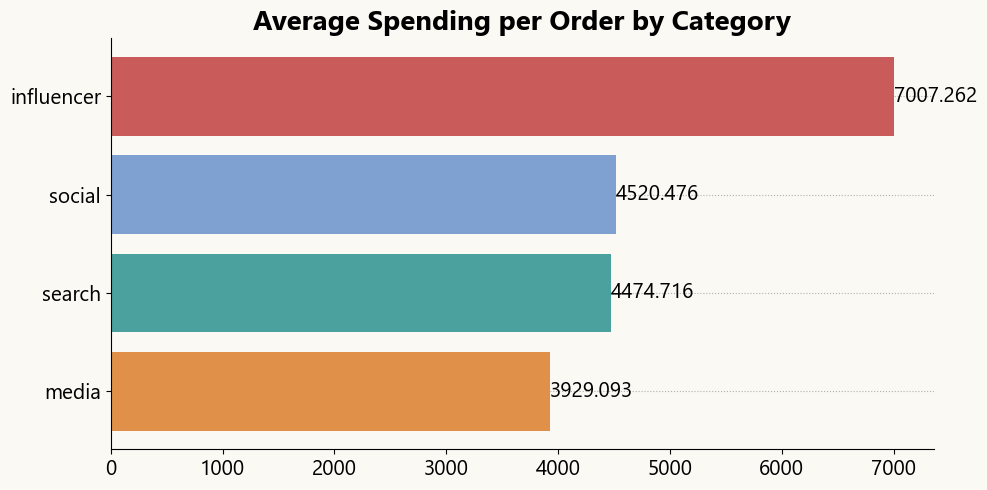

In [57]:
plot_hbars_custom(
    df=sumtab_cat.sort_values("avg_spending_per_order"),
    catcol="category",
    valcol="avg_spending_per_order",
    ptitle="Average Spending per Order by Category",
    coldict=cat_col_dict,
    myfont="Segoe UI",
    distbwpllab=0.000001,
    fs=(10, 5),
)

### Agreggate Visual for Key Metrics per Category

C:\Users\melko\AppData\Local\Temp\ipykernel_20316\4004947157.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid(shape=(16, 8), loc=(0, 0), colspan=4, rowspan=3)  # CPM


The graph was saved into d:\python\projects\digital_marketing


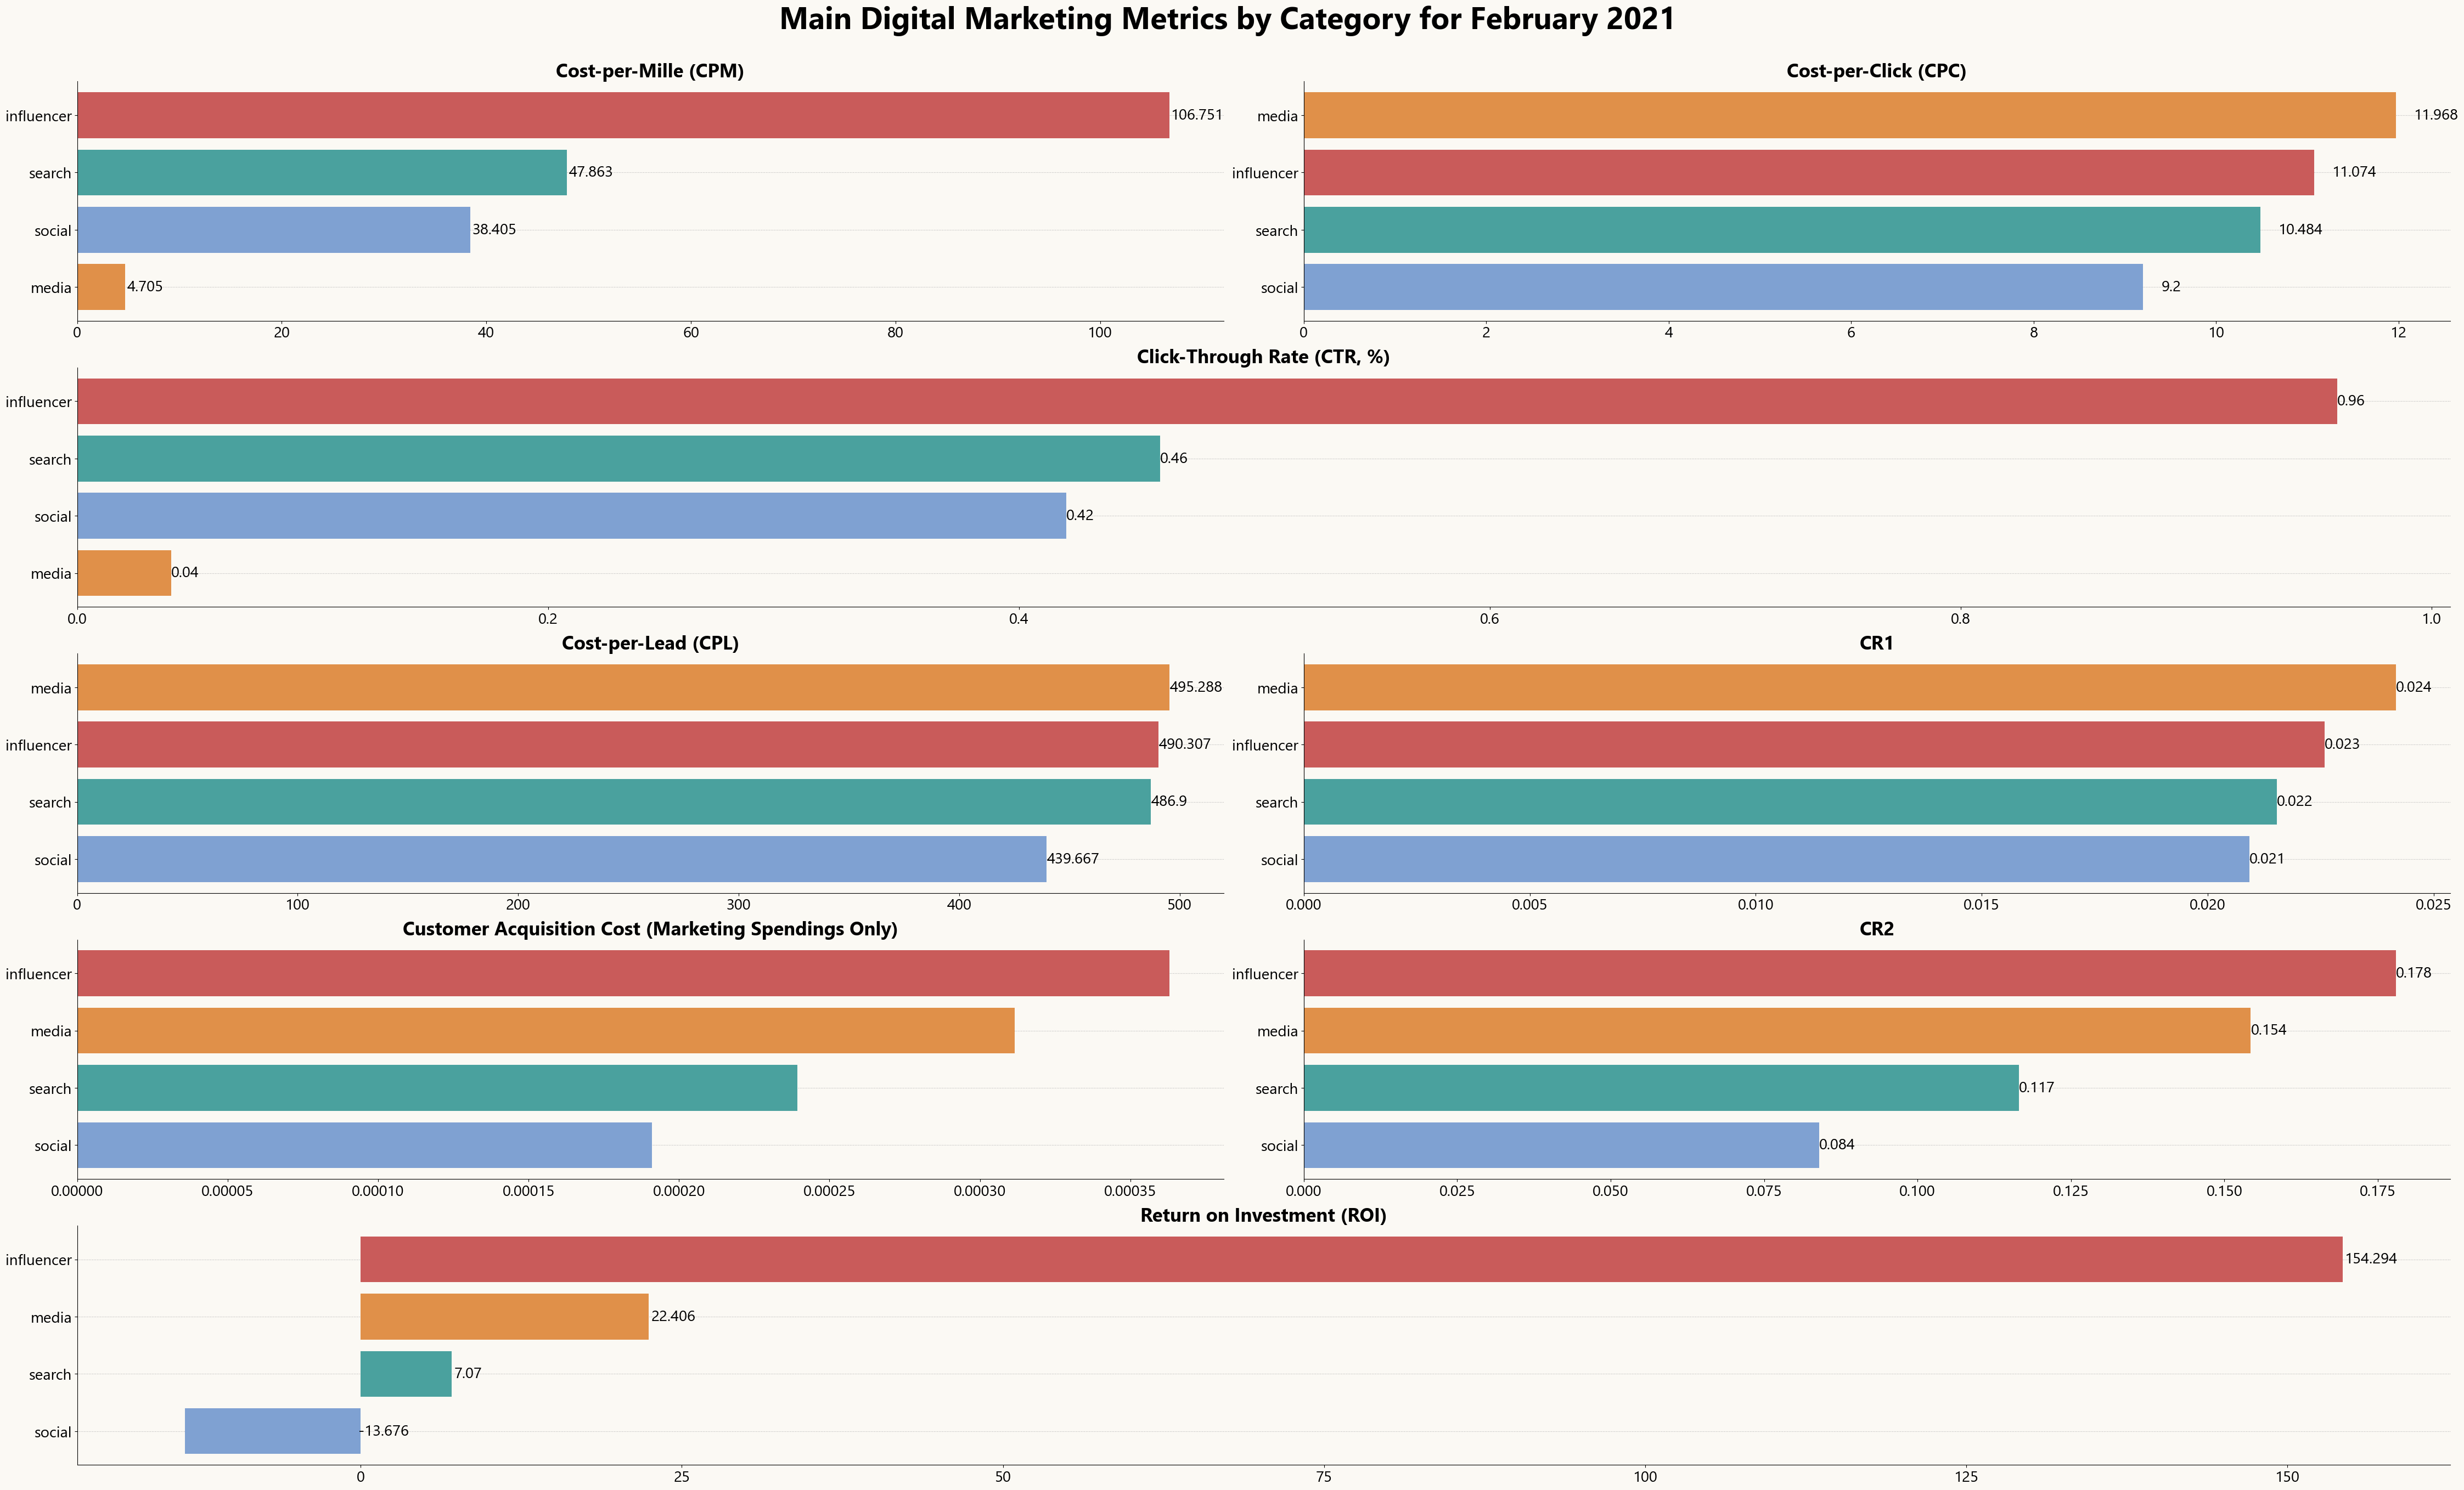

In [58]:
data = sumtab_cat

fig, axs = plt.subplots(figsize=(45, 30))
fig.set_facecolor(BG_WHITE)

ax1 = plt.subplot2grid(shape=(16, 8), loc=(0, 0), colspan=4, rowspan=3)  # CPM
ax2 = plt.subplot2grid(shape=(16, 8), loc=(0, 4), colspan=4, rowspan=3)  # CPC
ax3 = plt.subplot2grid(shape=(16, 8), loc=(3, 0), colspan=8, rowspan=3)  # CTR
ax4 = plt.subplot2grid(shape=(16, 8), loc=(6, 0), colspan=4, rowspan=3)  # CPL
ax5 = plt.subplot2grid(shape=(16, 8), loc=(6, 4), colspan=4, rowspan=3)  # CR1
ax6 = plt.subplot2grid(shape=(16, 8), loc=(9, 0), colspan=4, rowspan=3)  # CAC
ax7 = plt.subplot2grid(shape=(16, 8), loc=(9, 4), colspan=4, rowspan=3)  # CR2
ax8 = plt.subplot2grid(shape=(16, 8), loc=(12, 0), colspan=8, rowspan=3)  # ROI

plot_hbars_custom(
    df=data.sort_values("CPM"),
    catcol="category",
    valcol="CPM",
    ax=ax1,
    ptitle="Cost-per-Mille (CPM)",
    ptitlesize=25,
    textlabsize=20,
    ticksize=20,
    coldict=cat_col_dict,
    myfont="Segoe UI",
)

plot_hbars_custom(
    df=data.sort_values("CPC"),
    catcol="category",
    valcol="CPC",
    ax=ax2,
    ptitle="Cost-per-Click (CPC)",
    ptitlesize=25,
    textlabsize=20,
    ticksize=20,
    coldict=cat_col_dict,
    myfont="Segoe UI",
)

plot_hbars_custom(
    df=data.sort_values("CTR"),
    catcol="category",
    valcol="CTR",
    ax=ax3,
    ptitle="Click-Through Rate (CTR, %)",
    ptitlesize=25,
    textlabsize=20,
    ticksize=20,
    coldict=cat_col_dict,
    myfont="Segoe UI",
    distbwpllab=0.000001,
)

plot_hbars_custom(
    df=data.sort_values("CPL"),
    catcol="category",
    valcol="CPL",
    ax=ax4,
    ptitle="Cost-per-Lead (CPL)",
    ptitlesize=25,
    textlabsize=20,
    ticksize=20,
    coldict=cat_col_dict,
    myfont="Segoe UI",
)

plot_hbars_custom(
    df=data.sort_values("CR1"),
    catcol="category",
    valcol="CR1",
    ax=ax5,
    ptitle="CR1",
    ptitlesize=25,
    textlabsize=20,
    ticksize=20,
    coldict=cat_col_dict,
    myfont="Segoe UI",
    distbwpllab=0.000001,
)

plot_hbars_custom(
    df=data.sort_values("CAC_mark_only"),
    catcol="category",
    valcol="CAC_mark_only",
    ax=ax6,
    ptitle="Customer Acquisition Cost (Marketing Spendings Only)",
    ptitlesize=25,
    textlabsize=20,
    ticksize=20,
    coldict=cat_col_dict,
    myfont="Segoe UI",
    distbwpllab=0.000001,
    showlab=False,
)

plot_hbars_custom(
    df=data.sort_values("CR2"),
    catcol="category",
    valcol="CR2",
    ax=ax7,
    ptitle="CR2",
    ptitlesize=25,
    textlabsize=20,
    ticksize=20,
    coldict=cat_col_dict,
    myfont="Segoe UI",
    distbwpllab=0.000001,
)

plot_hbars_custom(
    df=data.sort_values("ROI"),
    catcol="category",
    valcol="ROI",
    ax=ax8,
    ptitle="Return on Investment (ROI)",
    ptitlesize=25,
    textlabsize=20,
    ticksize=20,
    coldict=cat_col_dict,
    myfont="Segoe UI",
    showlab=True,
)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle(
    "Main Digital Marketing Metrics by Category for February 2021 ",
    fontsize=40,
    fontfamily="Segoe UI",
    fontweight="bold",
)

save_fig_custom(filename="mmetrics_categories", figtosave=fig)

### Summary for Categories

Generally speaking,  marketing decisions for the considered period generated positive cashflows for the business. However, there are possibilities to improve.

Influencer category:

- As evident from the analysis, the most profitable marketing campaigns were conducted through influencers, achieving an impressive ROI of 154.294. Despite having the highest CPM among the categories and relatively higher CPC and CPL compared to media marketing campaigns, the Influencer category stands out for several key reasons. 

- The high CR1 in this category indicates that a significant portion of users who clicked on the ads successfully converted into leads. Moreover, the Influencer category demonstrated the highest CR2 among all categories, suggesting effective lead nurturing and conversion from leads to customers. 

- Additionally, the average spending per order in the Influencer category is also the highest among the categories analyzed, underscoring the value and effectiveness of influencer partnerships in driving higher-value conversions.

- The Influencer category has proven to be robust and effective in leveraging influencer partnerships to drive both engagement and conversion rates, making it a standout performer in the marketing mix.


Media category:

- It consists of  only one campaign called 'banner_partner'. Everything about it can be read above in summary about marketing campaigns.

Search category:

- The Search category comprises marketing campaigns executed primarily through Google. Analysis of the results demonstrates that these campaigns have proven to be profitable. The category shows strong engagement with a high CTR (Click-Through Rate) of 0.46, indicating effective ad placement and relevance to user searches.

- Despite having a moderate CPM and competitive CPC, the Search category maintains efficient spending on clicks generated, with CPC at 10.48. Conversion rates (CR1 and CR2) in this category, while moderate, suggest potential for improvement in lead conversion and sales funnel optimization.

- Moving forward, it is recommended that the business continues to leverage Google as a marketing channel. To enhance performance further, focusing on refining targeting strategies and optimizing the google_wide campaign, particularly through adjustments in keywords, ad copy, and bidding strategies, can help maximize ROI and overall campaign effectiveness.

Social category:

- The Social category primarily encompasses marketing campaigns conducted through platforms like Facebook. Analysis reveals mixed performance, with some challenges in key metrics. While the category demonstrates strengths in terms of CPM (38.41) and CPC (9.20), indicating relatively efficient cost management for impressions and clicks, it faces significant challenges in conversion metrics.

- Despite moderate engagement metrics such as a CTR (Click-Through Rate) of 0.42, the Social category shows the lowest CR1 (Conversion Rate 1) and CR2 (Conversion Rate 2) among all categories analyzed. This suggests potential difficulties in converting clicks and leads into actual sales or desired actions.





## General recommendations for the next period 

- Allocate more budget to YouTube blogger campaigns due to their exceptional ROI (277.32%). This channel shows efficient cost management and strong returns per investment.

- Stated above is also true for instagram_blogger campaign. However, the campaign can still be improved by optimazing costs.

-  Funds from some campaigns can be redirected into youtube_blogger/instagram_blogger campaign or to any other marketing campaign which falls under the category of "influencer".

- Even though banner_partner campaign (media category) resulted in a positive ROI, it has low CTR. I assume this campaign can be improved significantly by increasing CTR.

- Facebook_retargeting showed good result despite being expensive due to high CR2. I assume it can be improved by increasing CR1 and lowering costs.

- instagram_tier1 has a moderate CPM and CPC with a reasonable CPL and a positive ROI of 77.14. It  also showed good conversion rates (CR1: 2.46%, CR2: 11.43%) indicating effective engagement and follow-through. This campaign should be considered for the next period.

----

- facebook_tier2 was perfect at generating leads but needs significant improvement in CR2. In can be also improved in terms of CPL. In my opinion this campaign has very high potential due to conversion rate of clicks into leads. Even though it can't  be called a profitable one for the observed period, leads as a whole are very important as they are potential customers in next periods.

- The business should use Google as marketing platform (search category) but concentrate on increasing CR2 and reducing CPL for google_wide.

- I don't think that the business should continue using facebook_lal in the future as it is costly and bad at generating both leads and payable customers.

- facebook_tier1 should be significantly improved in terms of CR1.